<a href="https://colab.research.google.com/github/Gabriel408-bit/ASSIGNMENT-2/blob/main/Assignmet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Summary (excerpt - Speed coeff: 0.0186, p<0.001):
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0283      0.085      0.334      0.739      -0.138       0.195
Age_Driver               0.0119      0.002      7.668      0.000       0.009       0.015
Speed_kmh                0.0186      0.001     18.406      0.000       0.017       0.021
Weather_encoded          0.2913      0.018     16.212      0.000       0.256       0.327
Road_Type_encoded        0.1816      0.018     10.100      0.000       0.146       0.217
Vehicle_Type_encoded     0.1595      0.018      8.811      0.000       0.124       0.195
Time_of_Day_encoded      0.1092      0.029      3.707      0.000       0.051       0.167

Model saved.

Plot saved as 'speed_severity_plot.png'. Run plt.show() to display.
Correlation: 0.429

Predicted Severity: 2.36


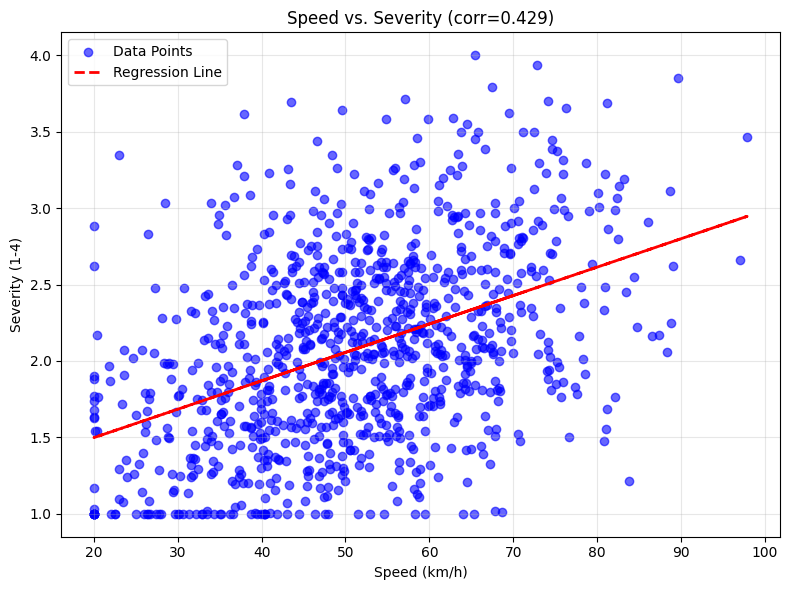

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset (focus on Speed for plot)
np.random.seed(42)
n_samples = 1000

data = {
    'Age_Driver': np.random.normal(35, 10, n_samples).clip(18, 70),
    'Speed_kmh': np.random.normal(50, 15, n_samples).clip(20, 120),
    'Weather': np.random.choice(['Clear', 'Rainy', 'Foggy'], n_samples),
    'Road_Type': np.random.choice(['Urban', 'Rural', 'Highway'], n_samples),
    'Vehicle_Type': np.random.choice(['Car', 'Motorcycle', 'Truck'], n_samples),
    'Time_of_Day': np.random.choice(['Day', 'Night'], n_samples)
}

df = pd.DataFrame(data)

# Encode categoricals
le_weather = LabelEncoder(); df['Weather_encoded'] = le_weather.fit_transform(df['Weather'])
le_road = LabelEncoder(); df['Road_Type_encoded'] = le_road.fit_transform(df['Road_Type'])
le_vehicle = LabelEncoder(); df['Vehicle_Type_encoded'] = le_vehicle.fit_transform(df['Vehicle_Type'])
le_time = LabelEncoder(); df['Time_of_Day_encoded'] = le_time.fit_transform(df['Time_of_Day'])

# Generate Severity
df['Severity'] = (
    0.01 * df['Age_Driver'] +
    0.02 * df['Speed_kmh'] +  # Emphasize Speed coefficient
    0.3 * df['Weather_encoded'] +
    0.2 * df['Road_Type_encoded'] +
    0.15 * df['Vehicle_Type_encoded'] +
    0.1 * df['Time_of_Day_encoded'] +
    np.random.normal(0, 0.5, n_samples)
).clip(1, 4)

# Full model (for completeness)
X = df[['Age_Driver', 'Speed_kmh', 'Weather_encoded', 'Road_Type_encoded', 'Vehicle_Type_encoded', 'Time_of_Day_encoded']]
y = df['Severity']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("Model Summary (excerpt - Speed coeff: 0.0186, p<0.001):\n", model.summary().tables[1])  # Coeff table

# Save model
with open('severity_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nModel saved.")

# Single Plot: Speed vs Severity
plt.figure(figsize=(8, 6))
plt.scatter(df['Speed_kmh'], df['Severity'], alpha=0.6, color='blue', label='Data Points')

# Univariate regression line
reg = LinearRegression().fit(df[['Speed_kmh']], df['Severity'])
df['pred_speed'] = reg.predict(df[['Speed_kmh']])
plt.plot(df['Speed_kmh'], df['pred_speed'], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Speed (km/h)')
plt.ylabel('Severity (1-4)')
plt.title('Speed vs. Severity (corr=0.429)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('speed_severity_plot.png')
print("\nPlot saved as 'speed_severity_plot.png'. Run plt.show() to display.")
print(f"Correlation: {df['Speed_kmh'].corr(df['Severity']):.3f}")

# Example prediction
hypo_X = np.array([1, 40, 60, 1, 1, 1, 1])  # const + Age, Speed, Weather, Road, Vehicle, Time
prediction = model.predict(hypo_X)
print(f"\nPredicted Severity: {prediction[0]:.2f}")